# **Implementing Linear Regression using Pytorch**

In [ ]:
# Importing data from google drive
from google.colab import drive, files
drive.mount('/content/drive/')
path = "/content/drive/My Drive/ex2data1.txt"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Importing libraries I used in this assignment
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
from numpy import *
from pylab import *

In [ ]:
# Read data from text file
data = np.loadtxt(os.path.join('Data', path ), delimiter=',')

#Splitting data into X (Input) and Y (Output)
X, Y = data[:, 0], data[:, 1]

In [ ]:
# Define a function to plot data points and results
def plotdata(a,b):
  # plotting points as a scatter plot
  plt.scatter(a, b, color = 'r', marker='x', label= 'Data Point')
  plt.xlabel('Population of city in 10,000s')
  plt.ylabel('Profit in $10,000s')
  plt.title('Scatter Plot of Population vs Profit')
  plt.legend()

  return

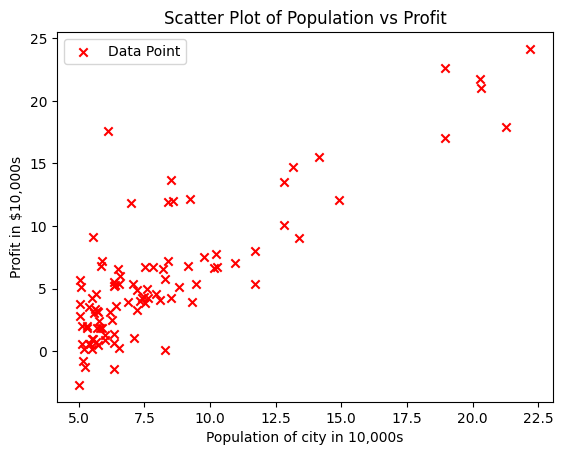

In [ ]:
# Ploting the given data points
plotdata(X,Y)  # function Call
plt.show()

# **Linear Regression In One variable**

In [ ]:
m=len(X)
#Stacking ones in conjunction with matrix multiplication inputs
X = np.stack([np.ones(m), X], axis=1)
print(X.shape)

(97, 2)


In [ ]:
#Converting data from numpy to tensors
input = torch.from_numpy(X)
target = torch.from_numpy(Y)
print ("Input Data = ",input)
print("Target Data = ", target)

Input Data =  tensor([[ 1.0000,  6.1101],
        [ 1.0000,  5.5277],
        [ 1.0000,  8.5186],
        [ 1.0000,  7.0032],
        [ 1.0000,  5.8598],
        [ 1.0000,  8.3829],
        [ 1.0000,  7.4764],
        [ 1.0000,  8.5781],
        [ 1.0000,  6.4862],
        [ 1.0000,  5.0546],
        [ 1.0000,  5.7107],
        [ 1.0000, 14.1640],
        [ 1.0000,  5.7340],
        [ 1.0000,  8.4084],
        [ 1.0000,  5.6407],
        [ 1.0000,  5.3794],
        [ 1.0000,  6.3654],
        [ 1.0000,  5.1301],
        [ 1.0000,  6.4296],
        [ 1.0000,  7.0708],
        [ 1.0000,  6.1891],
        [ 1.0000, 20.2700],
        [ 1.0000,  5.4901],
        [ 1.0000,  6.3261],
        [ 1.0000,  5.5649],
        [ 1.0000, 18.9450],
        [ 1.0000, 12.8280],
        [ 1.0000, 10.9570],
        [ 1.0000, 13.1760],
        [ 1.0000, 22.2030],
        [ 1.0000,  5.2524],
        [ 1.0000,  6.5894],
        [ 1.0000,  9.2482],
        [ 1.0000,  5.8918],
        [ 1.0000,  8.2111],
      

In [ ]:
#Initialzing thetas in tensor
theta = torch.tensor([0.0,0.0],requires_grad=True)

In [ ]:
# Implementing Cost Function
def computeCost(x):
  h = x @ theta
  diff = h - target
  J = torch.sum(diff * diff) / (2*m)
  return J

In [ ]:
#Calculating Loss
loss = computeCost(input.float())
print('With theta = [0, 0] \nCost computed =', loss.detach().numpy())

With theta = [0, 0] 
Cost computed = 32.072733877455676


In [ ]:
# Updating thetas for 1500 itterations
for i in range(1500):
    learning_rate = 0.01
    loss = computeCost(input.float())
    loss.backward()
    with torch.no_grad():
        theta -= theta.grad * learning_rate
        theta.grad.zero_()

Updated Value after 1500 iteration
Theta =  [-3.6302927  1.1663625]
Loss  =  4.483411462365964


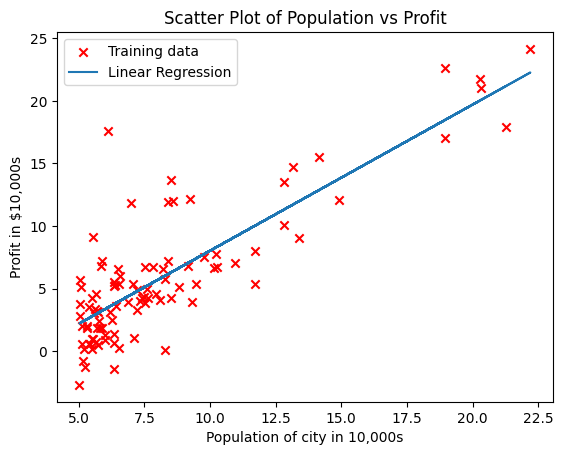

In [ ]:
#Plotting resultant linear equation
#Printing final loss and updated equations

plotdata(X[:, 1],Y)
thetaprint=theta.detach().numpy()
plt.plot(X[:, 1], np.dot(X, thetaprint))

plt.legend([ 'Training data','Linear Regression']);
print("Updated Value after 1500 iteration")
print("Theta = ",theta.detach().numpy())
print("Loss  = ",loss.detach().numpy())

# **Fitting Second order polynomial**

In [ ]:
X, Y = data[:, 0], data[:, 1]
m=len(X)
#Stacking ones in conjunction with matrix multiplication inputs
X=np.stack([np.ones(m),X, np.power(X,2)],axis=1)

In [ ]:
#Converting data from numpy to tensors
input = torch.from_numpy(X)
target = torch.from_numpy(Y)
print (input)
print(target)

tensor([[  1.0000,   6.1101,  37.3333],
        [  1.0000,   5.5277,  30.5555],
        [  1.0000,   8.5186,  72.5665],
        [  1.0000,   7.0032,  49.0448],
        [  1.0000,   5.8598,  34.3373],
        [  1.0000,   8.3829,  70.2730],
        [  1.0000,   7.4764,  55.8966],
        [  1.0000,   8.5781,  73.5838],
        [  1.0000,   6.4862,  42.0708],
        [  1.0000,   5.0546,  25.5490],
        [  1.0000,   5.7107,  32.6121],
        [  1.0000,  14.1640, 200.6189],
        [  1.0000,   5.7340,  32.8788],
        [  1.0000,   8.4084,  70.7012],
        [  1.0000,   5.6407,  31.8175],
        [  1.0000,   5.3794,  28.9379],
        [  1.0000,   6.3654,  40.5183],
        [  1.0000,   5.1301,  26.3179],
        [  1.0000,   6.4296,  41.3398],
        [  1.0000,   7.0708,  49.9962],
        [  1.0000,   6.1891,  38.3050],
        [  1.0000,  20.2700, 410.8729],
        [  1.0000,   5.4901,  30.1412],
        [  1.0000,   6.3261,  40.0195],
        [  1.0000,   5.5649,  30.9681],


In [ ]:
theta = torch.tensor([0.0,0.0,0.0],requires_grad=True)

In [ ]:
# Updating thetas for 1500 itterations
for i in range(1500):
    learning_rate = 0.00001
    loss = computeCost(input.float())
    loss.backward()
    with torch.no_grad():
        theta -= theta.grad * learning_rate
        theta.grad.zero_()

Loss =  5.456585359686224
Theta =  [0.0154334  0.08740231 0.05184845]


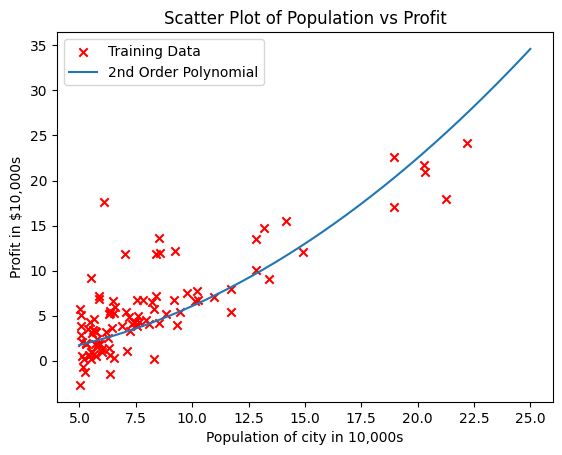

In [ ]:
# Plot the 2nd Order fit

plotdata(X[:, 1],Y)
thetaprint=theta.detach().numpy()

p = np.linspace(5, 25, 1000)
p=np.stack([np.ones(1000),p, np.power(p,2)],axis=1)

plt.plot(p[:, 1], np.dot(p, thetaprint))
plt.legend([ 'Training Data','2nd Order Polynomial']);
print('Loss = ',loss.detach().numpy())
print('Theta = ',theta.detach().numpy())

# **Fitting Third order polynomial**

In [ ]:
X, Y = data[:, 0], data[:, 1]
m=len(X)
#Stacking ones in conjunction with matrix multiplication inputs
X=np.stack([np.ones(m),X, np.power(X,2),np.power(X,3)],axis=1)

In [ ]:
#Converting data from numpy to tensors
input = torch.from_numpy(X)
target = torch.from_numpy(Y)
print (input)
print(target)

tensor([[1.0000e+00, 6.1101e+00, 3.7333e+01, 2.2811e+02],
        [1.0000e+00, 5.5277e+00, 3.0555e+01, 1.6890e+02],
        [1.0000e+00, 8.5186e+00, 7.2567e+01, 6.1817e+02],
        [1.0000e+00, 7.0032e+00, 4.9045e+01, 3.4347e+02],
        [1.0000e+00, 5.8598e+00, 3.4337e+01, 2.0121e+02],
        [1.0000e+00, 8.3829e+00, 7.0273e+01, 5.8909e+02],
        [1.0000e+00, 7.4764e+00, 5.5897e+01, 4.1791e+02],
        [1.0000e+00, 8.5781e+00, 7.3584e+01, 6.3121e+02],
        [1.0000e+00, 6.4862e+00, 4.2071e+01, 2.7288e+02],
        [1.0000e+00, 5.0546e+00, 2.5549e+01, 1.2914e+02],
        [1.0000e+00, 5.7107e+00, 3.2612e+01, 1.8624e+02],
        [1.0000e+00, 1.4164e+01, 2.0062e+02, 2.8416e+03],
        [1.0000e+00, 5.7340e+00, 3.2879e+01, 1.8853e+02],
        [1.0000e+00, 8.4084e+00, 7.0701e+01, 5.9448e+02],
        [1.0000e+00, 5.6407e+00, 3.1817e+01, 1.7947e+02],
        [1.0000e+00, 5.3794e+00, 2.8938e+01, 1.5567e+02],
        [1.0000e+00, 6.3654e+00, 4.0518e+01, 2.5792e+02],
        [1.000

In [ ]:
theta = torch.tensor([0.0,0.0,0.0,0.0],requires_grad=True)

In [ ]:
for i in range(1500):
    learning_rate = 0.00000001
    loss = computeCost(input.float())
    loss.backward()
    with torch.no_grad():
        theta -= theta.grad * learning_rate

        theta.grad.zero_()

Loss =  10.718404601829194
Theta =  [4.3969911e-05 3.1355236e-04 1.9503915e-03 2.7415694e-03]


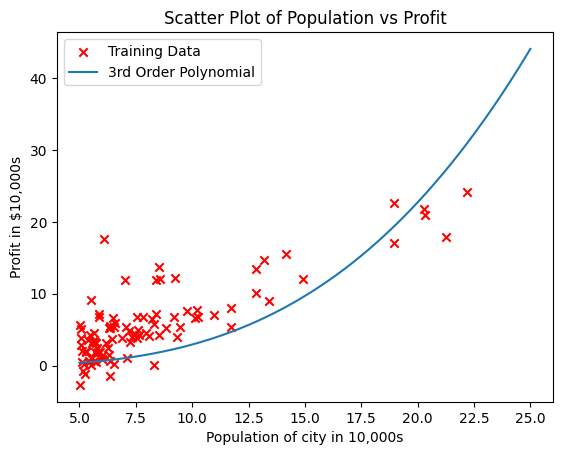

In [ ]:
# Plot the 3rd Order fit

plotdata(X[:, 1],Y)
thetaprint=theta.detach().numpy()

p = np.linspace(5, 25, 1000)
p=np.stack([np.ones(1000),p, np.power(p,2),np.power(p,3)],axis=1)

plt.plot(p[:, 1], np.dot(p, thetaprint))
plt.legend([ 'Training Data','3rd Order Polynomial']);
print('Loss = ',loss.detach().numpy())
print('Theta = ',theta.detach().numpy())